<a href="https://colab.research.google.com/github/HarshaSolingaram/INFO_5731/blob/main/Solingaram_Harshavardhan_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
!pip install numpy pandas scikit-learn matplotlib nltk

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
import re
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Sample dataset of reviews
mypath = '/content/drive/My Drive/INFO 5731/df_clean.csv'
df = pd.read_csv(mypath)
print("length of dataset",len(df))

#lets limit the data set to 150 reviews, the colab server is not supporting for the whole data set and it chrashed for me.
# so i am limiting the dataset to 150, so that it can be quick and supportive
df = df.head(150)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
length of dataset 9997


,abstract,noise_removed,numbers_removed,stopwords_removed,lowercased,stemmed,lemmatized
0,"We present Fashion-MNIST, a new dataset compri...",We present FashionMNIST a new dataset comprisi...,We present FashionMNIST a new dataset comprisi...,present fashionmnist new dataset comprising x ...,present fashionmnist new dataset comprising x ...,present fashionmnist new dataset compris x gra...,present fashionmnist new dataset comprising x ...
1,TensorFlow is a machine learning system that o...,TensorFlow is a machine learning system that o...,TensorFlow is a machine learning system that o...,tensorflow machine learning system operates la...,tensorflow machine learning system operates la...,tensorflow machin learn system oper larg scale...,tensorflow machine learning system operates la...
2,TensorFlow is an interface for expressing mach...,TensorFlow is an interface for expressing mach...,TensorFlow is an interface for expressing mach...,tensorflow interface expressing machine learni...,tensorflow interface expressing machine learni...,tensorflow interfac express machin learn algor...,tensorflow interface expressing machine learni...
3,The goal of precipitation nowcasting is to pre...,The goal of precipitation nowcasting is to pre...,The goal of precipitation nowcasting is to pre...,goal precipitation nowcasting predict future r...,goal precipitation nowcasting predict future r...,goal precipit nowcast predict futur rainfal in...,goal precipitation nowcasting predict future r...
4,Machine learning addresses the question of how...,Machine learning addresses the question of how...,Machine learning addresses the question of how...,machine learning addresses question build comp...,machine learning addresses question build comp...,machin learn address question build comput imp...,machine learning address question build comput...
...,...,...,...,...,...,...,...
145,A basic idea of quantum computing is surprisin...,A basic idea of quantum computing is surprisin...,A basic idea of quantum computing is surprisin...,basic idea quantum computing surprisingly simi...,basic idea quantum computing surprisingly simi...,basic idea quantum comput surprisingli similar...,basic idea quantum computing surprisingly simi...
146,Measuring consumption and wealth remotely Nigh...,Measuring consumption and wealth remotely Nigh...,Measuring consumption and wealth remotely Nigh...,measuring consumption wealth remotely nighttim...,measuring consumption wealth remotely nighttim...,measur consumpt wealth remot nighttim light ro...,measuring consumption wealth remotely nighttim...
147,As machine learning becomes widely used for au...,As machine learning becomes widely used for au...,As machine learning becomes widely used for au...,machine learning becomes widely used automated...,machine learning becomes widely used automated...,machin learn becom wide use autom decis attack...,machine learning becomes widely used automated...
148,Nearly all aspects of modern life are in some ...,Nearly all aspects of modern life are in some ...,Nearly all aspects of modern life are in some ...,nearly aspects modern life way changed big dat...,nearly aspects modern life way changed big dat...,nearli aspect modern life way chang big data m...,nearly aspect modern life way changed big data...


In [3]:
from nltk.tokenize import RegexpTokenizer
!pip install stop_words
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer

tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()

df['lowercased'] = df['lowercased'].fillna('')
df['lowercased']

0      present fashionmnist new dataset comprising x ...
1      tensorflow machine learning system operates la...
2      tensorflow interface expressing machine learni...
3      goal precipitation nowcasting predict future r...
4      machine learning addresses question build comp...
                             ...                        
145    basic idea quantum computing surprisingly simi...
146    measuring consumption wealth remotely nighttim...
147    machine learning becomes widely used automated...
148    nearly aspects modern life way changed big dat...
149    psychology historically concerned first foremo...
Name: lowercased, Length: 150, dtype: object

In [4]:
df['Tokenization'] = df['lowercased'].apply(lambda x: tokenizer.tokenize(x))
df['Tokens'] = df['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
df['Stemming'] = df['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [5]:
texts = []
for line in df['Stemming']:
  texts.append(line)

In [6]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

['present', 'fashionmnist', 'new', 'dataset', 'compris', 'x', 'grayscal', 'imag', 'fashion', 'product', 'categori', 'imag', 'per', 'categori', 'train', 'set', 'imag', 'test', 'set', 'imag', 'fashionmnist', 'intend', 'serv', 'direct', 'dropin', 'replac', 'origin', 'mnist', 'dataset', 'benchmark', 'machin', 'learn', 'algorithm', 'share', 'imag', 'size', 'data', 'format', 'structur', 'train', 'test', 'split', 'dataset', 'freeli', 'avail', 'http', 'url']


In [7]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out



In [8]:
from spacy.cli.download import download
download(model="en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['present', 'fashionmnist', 'new', 'dataset', 'grayscal', 'imag', 'fashion', 'product', 'categori', 'imag', 'train', 'set', 'imag', 'test', 'set', 'imag', 'fashionmnist', 'intend', 'serv', 'direct', 'share', 'size', 'datum', 'format', 'train', 'test', 'split', 'url']]


In [10]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 4), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1)]]


In [11]:
id2word[1]

'dataset'

In [12]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('categori', 1),
  ('dataset', 1),
  ('datum', 1),
  ('direct', 1),
  ('fashion', 1),
  ('fashionmnist', 2),
  ('format', 1),
  ('grayscal', 1),
  ('imag', 4),
  ('intend', 1),
  ('new', 1),
  ('present', 1),
  ('product', 1),
  ('serv', 1),
  ('set', 2),
  ('share', 1),
  ('size', 1),
  ('split', 1),
  ('test', 2),
  ('train', 2),
  ('url', 1)]]

##LDA


In [13]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [14]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.069*"learn" + 0.030*"machin" + 0.017*"datum" + 0.013*"system" + '
  '0.012*"use" + 0.011*"research" + 0.010*"detect" + 0.009*"differ" + '
  '0.009*"process" + 0.009*"imag"'),
 (1,
  '0.032*"evolut" + 0.031*"direct" + 0.028*"test" + 0.025*"variant" + '
  '0.018*"protein" + 0.015*"approach" + 0.012*"trend" + 0.012*"select" + '
  '0.011*"cf" + 0.011*"featur"'),
 (2,
  '0.019*"optic" + 0.014*"present" + 0.013*"spark" + 0.013*"commun" + '
  '0.011*"distinct" + 0.010*"resourc" + 0.010*"global" + 0.010*"maintain" + '
  '0.010*"graph" + 0.009*"code"'),
 (3,
  '0.057*"learn" + 0.031*"machin" + 0.021*"datum" + 0.017*"use" + '
  '0.017*"model" + 0.014*"deep" + 0.011*"also" + 0.010*"comput" + 0.009*"new" '
  '+ 0.009*"set"'),
 (4,
  '0.031*"modal" + 0.018*"fusion" + 0.016*"tempor" + 0.011*"equival" + '
  '0.009*"increa" + 0.008*"chalearn" + 0.008*"audio" + 0.008*"localis" + '
  '0.008*"futhermor" + 0.008*"motion"'),
 (5,
  '0.044*"model" + 0.043*"learn" + 0.022*"train" + 0.020*"machin" +

In [15]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.892630944567329

Coherence Score:  0.350891867885562


##LSA

In [16]:
lsamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)

In [17]:
pprint(lsamodel.print_topics(num_topics = 10))

[(0,
  '-0.704*"learn" + -0.328*"machin" + -0.304*"model" + -0.205*"datum" + '
  '-0.185*"use" + -0.109*"train" + -0.092*"deep" + -0.089*"method" + '
  '-0.089*"exampl" + -0.079*"system"'),
 (1,
  '0.662*"model" + -0.392*"learn" + 0.320*"train" + 0.285*"attack" + '
  '0.167*"adversari" + -0.128*"machin" + 0.121*"use" + -0.120*"deep" + '
  '0.088*"exampl" + 0.075*"substitut"'),
 (2,
  '0.281*"use" + 0.274*"method" + -0.265*"model" + 0.232*"datum" + '
  '-0.198*"learn" + -0.181*"attack" + 0.169*"system" + 0.162*"set" + '
  '0.160*"result" + 0.134*"show"'),
 (3,
  '0.632*"datum" + -0.230*"machin" + -0.220*"interpret" + -0.185*"use" + '
  '0.174*"train" + 0.155*"exampl" + 0.155*"number" + -0.135*"system" + '
  '0.120*"set" + -0.120*"research"'),
 (4,
  '-0.400*"interpret" + 0.295*"attack" + -0.230*"model" + 0.224*"use" + '
  '-0.215*"datum" + -0.208*"predict" + 0.186*"deep" + 0.183*"adversari" + '
  '-0.173*"framework" + 0.157*"train"'),
 (5,
  '0.277*"deep" + -0.258*"machin" + -0.250*"sys

LSA Model with 2 topics:
[(0,
  '-0.704*"learn" + -0.328*"machin" + -0.304*"model" + -0.205*"datum" + '
  '-0.185*"use" + -0.109*"train" + -0.092*"deep" + -0.089*"method" + '
  '-0.089*"exampl" + -0.079*"system"'),
 (1,
  '-0.662*"model" + 0.392*"learn" + -0.320*"train" + -0.285*"attack" + '
  '-0.167*"adversari" + 0.128*"machin" + -0.121*"use" + 0.120*"deep" + '
  '-0.088*"exampl" + -0.075*"substitut"')]
Coherence Value for 2 topics: 0.3714465006389691
LSA Model with 3 topics:
[(0,
  '-0.704*"learn" + -0.328*"machin" + -0.304*"model" + -0.205*"datum" + '
  '-0.185*"use" + -0.109*"train" + -0.092*"deep" + -0.089*"method" + '
  '-0.089*"exampl" + -0.079*"system"'),
 (1,
  '0.662*"model" + -0.392*"learn" + 0.320*"train" + 0.285*"attack" + '
  '0.167*"adversari" + -0.128*"machin" + 0.121*"use" + -0.120*"deep" + '
  '0.088*"exampl" + 0.075*"substitut"'),
 (2,
  '0.281*"use" + 0.274*"method" + -0.265*"model" + 0.232*"datum" + '
  '-0.198*"learn" + -0.181*"attack" + 0.169*"system" + 0.162*"s

/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Coherence Value for 8 topics: nan
LSA Model with 9 topics:
[(0,
  '-0.704*"learn" + -0.328*"machin" + -0.304*"model" + -0.205*"datum" + '
  '-0.185*"use" + -0.109*"train" + -0.092*"deep" + -0.089*"method" + '
  '-0.089*"exampl" + -0.079*"system"'),
 (1,
  '-0.662*"model" + 0.392*"learn" + -0.320*"train" + -0.285*"attack" + '
  '-0.167*"adversari" + 0.128*"machin" + -0.121*"use" + 0.120*"deep" + '
  '-0.088*"exampl" + -0.075*"substitut"'),
 (2,
  '0.281*"use" + 0.274*"method" + -0.265*"model" + 0.232*"datum" + '
  '-0.198*"learn" + -0.181*"attack" + 0.169*"system" + 0.162*"set" + '
  '0.160*"result" + 0.134*"show"'),
 (3,
  '0.632*"datum" + -0.230*"machin" + -0.220*"interpret" + -0.185*"use" + '
  '0.174*"train" + 0.155*"exampl" + 0.155*"number" + -0.135*"system" + '
  '0.120*"set" + -0.120*"research"'),
 (4,
  '-0.400*"interpret" + 0.295*"attack" + -0.230*"model" + 0.224*"use" + '
  '-0.215*"datum" + -0.208*"predict" + 0.186*"deep" + 0.183*"adversari" + '
  '-0.173*"framework" + 0.157*

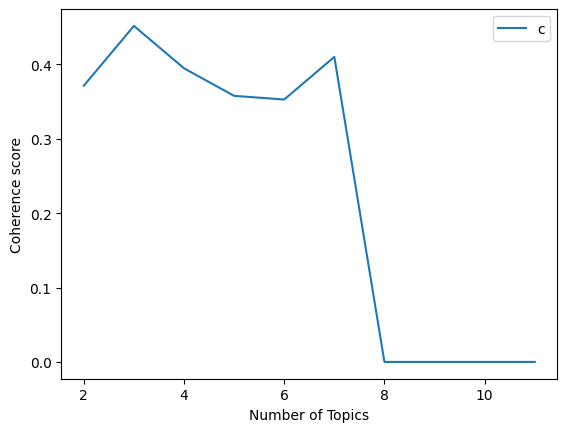

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel, LsiModel
import numpy as np


model_list = []
coherence_values = []
for num_topics in range(2, 12):
    model = LsiModel(corpus, num_topics=num_topics, id2word=id2word)
    model_list.append(model)

    print(f"LSA Model with {num_topics} topics:")
    pprint(model.print_topics())

    coherencemodel = CoherenceModel(model=model, texts=df['Stemming'], dictionary=id2word, coherence='c_v')
    coherence = coherencemodel.get_coherence()

    print(f"Coherence Value for {num_topics} topics: {coherence}")

    coherence_values.append(coherence)


clean_coherence_values = [value if not np.isnan(value) else 0 for value in coherence_values]  # Replace nan with 0

plt.plot(range(2, 12), clean_coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#Summarize the topic of each cluster
###LDA:
Cluster 0 (Machine Learning Fundamentals):
This topic is heavily focused on "learning," "machine," "data," and "system," indicating discussions around fundamental machine learning concepts, usage in systems, and data processing. This cluster might contain documents related to basic research and applications in machine learning.

Cluster 1 (Biological Sciences and Testing):
Keywords like "evolution," "direct," "test," "variant," and "protein" suggest this topic relates to biological sciences, perhaps discussing evolutionary biology, genetic testing, and protein studies. This could involve research papers or studies in genetic variations and protein functions.

Cluster 2 (Technology and Communication):
With terms such as "optic," "spark," "communication," and "global," this cluster seems to focus on optical technologies, communication systems, and possibly data technologies like Apache Spark. It reflects content that might be discussing advancements in global communication technologies and networks.

Cluster 3 (Advanced Machine Learning):
This topic includes terms like "deep," "model," and "computing," indicating a focus on deep learning models and computational aspects. It likely covers advanced machine learning techniques and their computational implementations.

Cluster 4 (Multimodal Learning):
The presence of "modal," "fusion," "audio," and "motion" suggests discussions on multimodal learning systems that integrate various types of data inputs, such as audio and motion, possibly in the context of human-computer interaction or multimedia systems.

Cluster 5 (Machine Learning Applications):
This cluster, with "model," "train," "attack," and "method," seems centered around practical applications of machine learning models, including training methods and handling security issues like cyber-attacks.

Cluster 6 (Engineering and Design):
Featuring unusual terms like "stream," "fluid," "flow," and "generatorstransform," this topic likely relates to engineering topics, particularly fluid dynamics and stream processing in computational contexts.

Cluster 7 (Environmental Science and Prediction):
With "preprocess," "soil," "predict," and "asset," this cluster seems to focus on environmental sciences and predictive models, potentially discussing soil analysis, data preprocessing for environmental data, and asset prediction in ecological or agricultural settings.

Cluster 8 (Data Science and Analysis):
Dominated by "oversampling," "data," "result," and "light," this topic likely discusses data handling techniques such as oversampling in statistical analysis, with applications possibly in light-related phenomena or in contexts where data imbalance is an issue.

Cluster 9 (Emerging Techniques in Machine Learning):
This cluster, with very low weight terms like "rnn" (Recurrent Neural Networks), "modern," and "sequence," appears to touch on very specific and perhaps cutting-edge techniques in machine learning, albeit not very extensively discussed in the dataset.

###LSA

Cluster 0 (Core Machine Learning Concepts)
Dominated by "learn," "machine," "model," and "datum," this cluster likely focuses on foundational concepts and techniques in machine learning, such as model training, data handling, and system integration.

Cluster 1 (Model Training and Security)
This topic appears to contrast "model" and "train" with "attack" and "adversari," suggesting discussions on training machine learning models while addressing security concerns, particularly adversarial attacks.

Cluster 2 (Methodological Approaches)
Featuring "use," "method," "datum," and "result," this topic likely discusses various methodological approaches in research, emphasizing practical outcomes and data-driven results.

Cluster 3 (Data and Training Dynamics)
This cluster centers around "datum" and "train" with an emphasis on "interpret" and "research," indicating a focus on interpreting data and understanding training dynamics in machine learning research.

Cluster 4 (Adversarial Learning and Interpretability)
With terms like "interpret," "attack," "adversari," and "predict," this topic discusses adversarial learning and interpretability within models, focusing on how models can be understood and manipulated.

Cluster 5 (Feature Engineering and Deep Learning Performance)
Highlighting "deep," "featur," and "perform," this topic is concerned with feature engineering and performance metrics in deep learning systems, discussing how features influence the effectiveness of deep learning models.

Cluster 6 (Adversarial Examples and Research)
This cluster focuses on "attack," "adversari," and "exampl," alongside "research" and "method," indicating a deep dive into research on adversarial methods and examples within machine learning.

Cluster 7 (Graph Models and Evolutionary Algorithms)
With terms like "graph," "machin," "evolut," and "variant," this topic likely addresses machine learning techniques involving graph models and evolutionary algorithms, discussing how these methods handle data and feature evolution.

Cluster 8 (Implementation of Deep Learning in Graph-Based Models)
Dominated by "deep," "graph," and "neural_network," this topic suggests a focus on implementing deep learning techniques within graph-based models, exploring how these models are utilized in neural networks.

Cluster 9 (System Analysis and Overfitting)
Centered around "system," "class," and "oversampl," this cluster discusses the systemic aspects of machine learning, including issues related to class imbalances and overfitting.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [21]:
# Write your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

mypath3 = '/content/drive/My Drive/INFO 5731/sentiment_analysis_results.csv'
Q2_df = pd.read_csv(mypath3)


Q2_df.dropna(inplace=True)
Q2_df['lemmatized'] = Q2_df['lemmatized'].astype(str)


X = Q2_df['lemmatized']
y = Q2_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(stop_words='english')

# Model 1: Multinomial Naive Bayes
nb_pipeline = make_pipeline(vectorizer, MultinomialNB())
nb_cv_scores = cross_val_score(nb_pipeline, X_train, y_train, cv=10, scoring='accuracy')
nb_pipeline.fit(X_train, y_train)

# Model 2: Logistic Regression
lr_pipeline = make_pipeline(vectorizer, LogisticRegression(random_state=42))
lr_cv_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=10, scoring='accuracy')
lr_pipeline.fit(X_train, y_train)

y_pred_nb = nb_pipeline.predict(X_test)
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluation Metrics
print("Naive Bayes - Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes - Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Naive Bayes - Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("Naive Bayes - F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))

print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Logistic Regression - Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("Logistic Regression - F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Naive Bayes - Accuracy: 0.8743114672008012
Naive Bayes - Precision: 0.8760651057231007
Naive Bayes - Recall: 0.8743114672008012
Naive Bayes - F1 Score: 0.8211888569810067
Logistic Regression - Accuracy: 0.9183775663495243
Logistic Regression - Precision: 0.9253909857933976
Logistic Regression - Recall: 0.9183775663495243
Logistic Regression - F1 Score: 0.8997963095625909


#Explanation

Feature Chosen: Lemmatization over stemming

Reason: Lemmatization is generally more effective for sentiment analysis due to its accuracy in handling word forms and contextual sensitivity, making it ideal for achieving precise semantic interpretation. However, if faced with computational constraints or less formal text sources, stemming may serve as a sufficient and computationally faster alternative.

Feature Representation: TF-IDF Vectorizer

Reason: TF-IDF is a common technique for transforming text into a meaningful representation of numbers which reflects not only the counts of words but also the importance of words in relation to the document corpus. This helps in emphasizing words that are more interesting, i.e., frequent in a document but not across documents.

Models Chosen

Multinomial Naive Bayes:
Reason: Naive Bayes classifiers are effective for categorization tasks and are particularly suited for text classification tasks with their assumption of independence among predictors.

Logistic Regression:
Reason: Logistic Regression is robust to noise and effective in high dimensional spaces, making it suitable for binary classifications like sentiment analysis.

Model Comparision:

Logistic Regression outperforms Naive Bayes across all key metrics in the sentiment analysis task. Specifically, Logistic Regression achieves a higher accuracy of 91.84% compared to 87.43% for Naive Bayes. It also leads in precision (92.54% vs. 87.61%), recall (91.84% vs. 87.43%), and F1 score (89.98% vs. 82.12%). These results demonstrate Logistic Regression's superior ability to accurately and reliably classify sentiments, making it the more effective model for this application.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [22]:
# Write your code here
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Sample dataset of reviews
mypath1 = '/content/drive/My Drive/INFO 5731/assignment4-question3-data/train.csv'
mypath2 = '/content/drive/My Drive/INFO 5731/assignment4-question3-data/test.csv'
df3_train = pd.read_csv(mypath1)

df3_test = pd.read_csv(mypath2)
df3_train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
df3_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
# i am  dropping the id number as that is just a index number of the data
df3_train = df3_train.drop('Id', axis=1)

df3_test = df3_test.drop('Id', axis=1)


In [25]:

# we does have null values in the data but those values going to affect the sales so i am not going to change any
null_columns = df3_test.columns[df3_test.isnull().any()]
print(null_columns)

print("\n")

# we does have null values in the data but those values going to affect the sales so i am not going to change any
null_columns = df3_train.columns[df3_train.isnull().any()]
print(null_columns)

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [26]:
print(df3_train.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


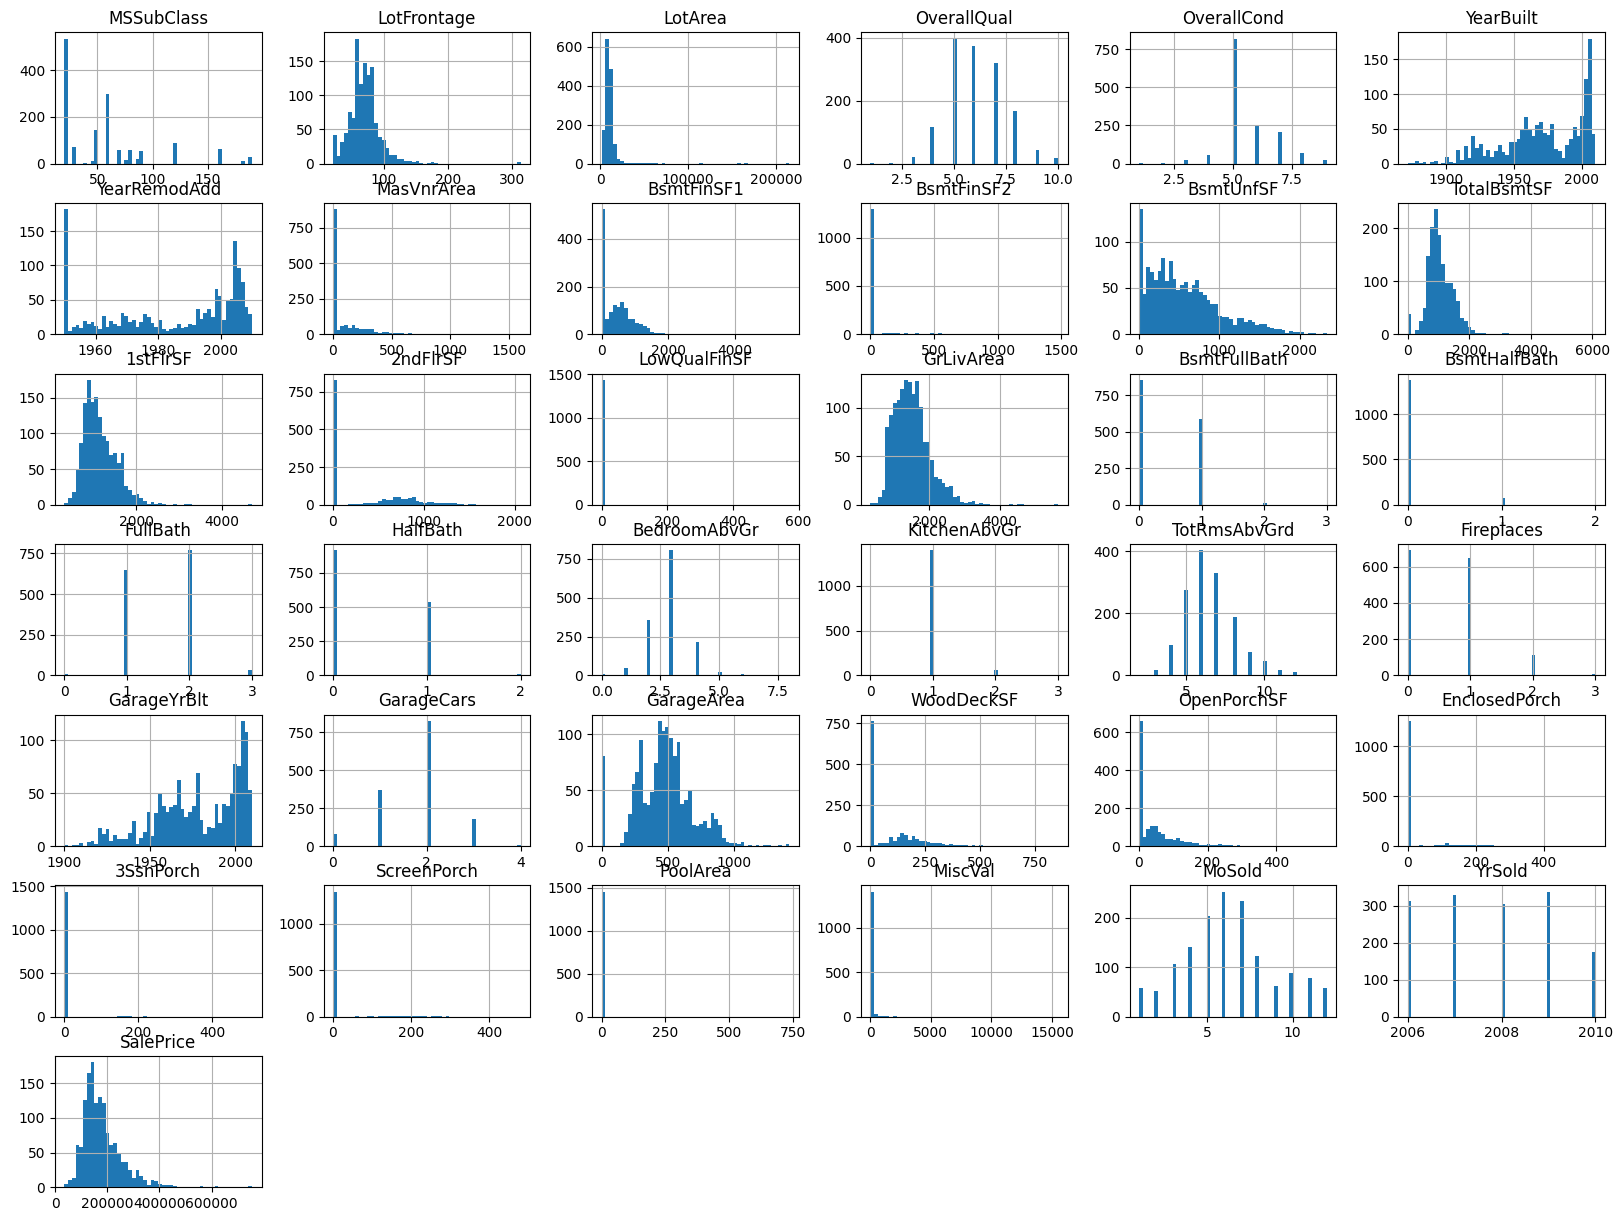

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
df3_train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [28]:
import numpy as np

numeric_cols = df3_train.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

sorted_correlations = corr_matrix["SalePrice"].sort_values(ascending=False)

print(sorted_correlations)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


##lets plot most correlated columns to salesprice


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

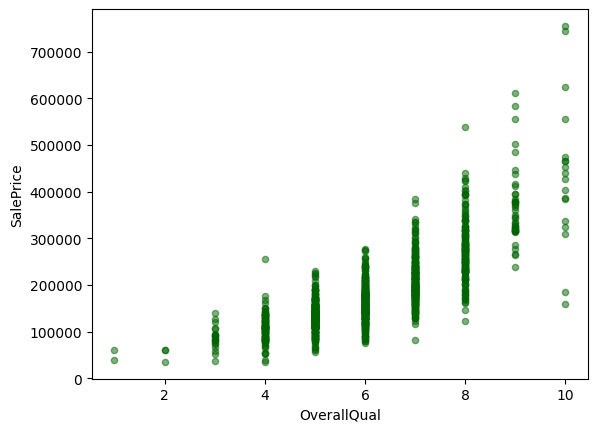

In [29]:
df3_train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5, color="darkgreen")

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

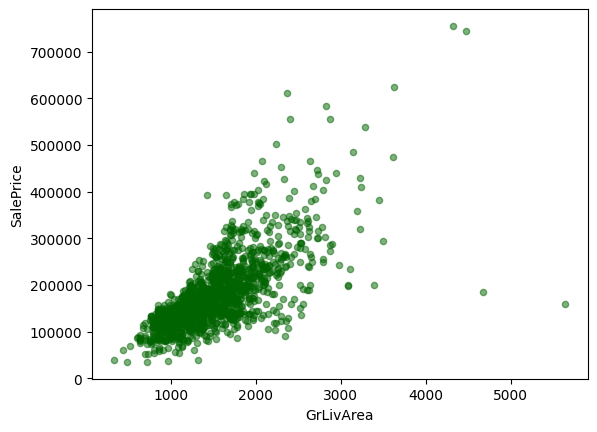

In [30]:
df3_train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5, color="darkgreen")

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

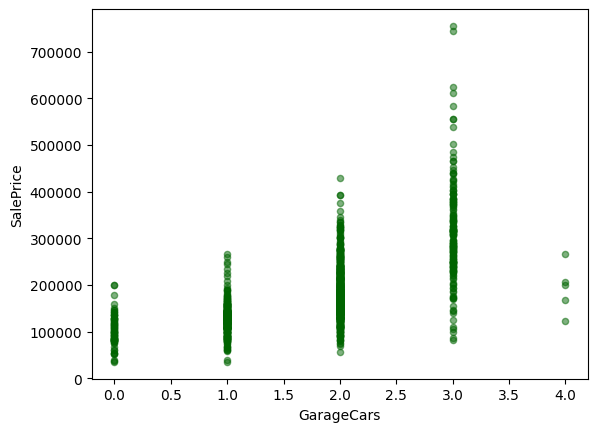

In [31]:

df3_train.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5, color = "darkgreen")

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'OverallQual'),
  Text(2, 0, 'GrLivArea'),
  Text(3, 0, 'GarageCars'),
  Text(4, 0, 'GarageArea'),
  Text(5, 0, 'TotalBsmtSF'),
  Text(6, 0, '1stFlrSF'),
  Text(7, 0, 'FullBath')])

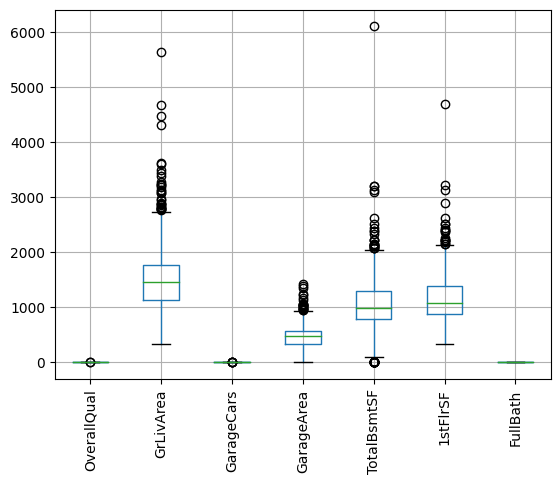

In [32]:
df3_train.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF','1stFlrSF', 'FullBath'])
plt.xticks(rotation=90)

In [33]:
df3_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [34]:
# Converting all columns to numeric in my dataset, coercing errors to NaN
df3_train = df3_train.apply(pd.to_numeric, errors='coerce')
df3_test = df3_test.apply(pd.to_numeric, errors='coerce')

# then replacing all NaN values with the mean of each column
df3_train.fillna(df3_train.mean(), inplace=True)
df3_test.fillna(df3_test.mean(), inplace=True)

print(df3_train.isnull().sum())
print("\n")
print(df3_test.isnull().sum())

print("\n After conversion: \n")
df3_train.fillna(df3_train.mean(), inplace = True)
df3_test.fillna(df3_test.mean(), inplace = True)

print(df3_train.isnull().sum())
print(df3_test.isnull().sum())

MSSubClass          0
MSZoning         1460
LotFrontage         0
LotArea             0
Street           1460
                 ... 
MoSold              0
YrSold              0
SaleType         1460
SaleCondition    1460
SalePrice           0
Length: 80, dtype: int64


MSSubClass          0
MSZoning         1459
LotFrontage         0
LotArea             0
Street           1459
                 ... 
MiscVal             0
MoSold              0
YrSold              0
SaleType         1459
SaleCondition    1459
Length: 79, dtype: int64

 After conversion: 

MSSubClass          0
MSZoning         1460
LotFrontage         0
LotArea             0
Street           1460
                 ... 
MoSold              0
YrSold              0
SaleType         1460
SaleCondition    1460
SalePrice           0
Length: 80, dtype: int64
MSSubClass          0
MSZoning         1459
LotFrontage         0
LotArea             0
Street           1459
                 ... 
MiscVal             0
MoSold              0

In [35]:
print(df3_train.columns)
print(df3_test.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [36]:
from sklearn.preprocessing import LabelEncoder
columns = ('MSSubClass', 'GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(df3_train[column].values))
    df3_train[column] = encoder.transform(list(df3_train[column].values))

In [37]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(df3_test[column].values))
    df3_test[column] = encoder_test.transform(list(df3_test[column].values))

## I have selected all the other variables except id, because directly of indirectly salesprice is depend on every variables as we can see in correlation matrix.


In [38]:

x_values = df3_train[df3_train.columns[:79]]
y_values = df3_train['SalePrice']


x_test_values = df3_test[df3_test.columns[:79]]

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=0)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
reg_model.score(X_train, y_train)
print(f'Model Score: {reg_model.score(X_train, y_train)}')

Model Score: 0.8418484287325223


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model evaluation on train dataset
y_pred_train = reg_model.predict(X_test)

# Evaluating the model on the internal test set
rmse = mean_squared_error(y_test, y_pred_train, squared=False)
mse = mean_squared_error(y_test, y_pred_train)
mae = mean_absolute_error(y_test, y_pred_train)
r2 = r2_score(y_test, y_pred_train)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 21744.430606571448
Mean Squared Error (MSE): 1895978713.8060997
Root Mean Squared Error (RMSE): 43542.83768665175
R-squared: 0.7207274850331613


##Prediction on the Test DataSet

In [41]:
y_pred = reg_model.predict(x_test_values)

In [42]:
# Converting the array to string and printing in one statement
print("Predicted sales prices of test dataset:\n" + str(y_pred))


Predicted sales prices of test dataset:
[129479.95006095 164036.80247562 178224.14718829 ... 188341.03650378
 102693.7033535  248251.54172229]


In [43]:
## ADDED SALES PRICE VALUES TO TEST DATA SET

df3_test['SalePrice'] = pd.DataFrame({'Pred SalePrice': y_pred})
df3_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,80.0,11622,0,0,0,0,0,0,...,0,0,0,0,0,5,4,0,0,129479.950061
1,0,0,81.0,14267,0,0,0,0,0,0,...,0,0,0,0,12500,5,4,0,0,164036.802476
2,5,0,74.0,13830,0,0,0,0,0,0,...,0,0,0,0,0,2,4,0,0,178224.147188
3,5,0,78.0,9978,0,0,0,0,0,0,...,0,0,0,0,0,5,4,0,0,200857.067591
4,11,0,43.0,5005,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,189350.501087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,13,0,21.0,1936,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,58852.084682
1455,13,0,21.0,1894,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,66500.647839
1456,0,0,160.0,20000,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,188341.036504
1457,9,0,62.0,10441,0,0,0,0,0,0,...,0,0,0,0,700,6,0,0,0,102693.703353


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


Point 1 -

DistilBERT is a smaller, faster, cheaper, and lighter version of BERT. It was created by the team at Hugging Face and is designed to retain 95% of BERT's performance while being 40% smaller and 60% faster.

Original Pretraining Data Sources: DistilBERT was pretrained on the same corpus as BERT, which includes the Toronto Book Corpus and English Wikipedia. It's distilled from the BERT model using a technique called knowledge distillation during the pre-training phase.

Number of Parameters: DistilBERT has approximately 66 million parameters, which is about half the number of the base BERT model (110 million parameters).

Task-specific Fine-tuning: The 'typeform/distilbert-base-uncased-mnli' variant was further fine-tuned on the MultiNLI (MNLI) dataset. The MNLI dataset consists of 433k sentence pairs annotated with textual entailment information. This fine-tuning makes it suitable for tasks like zero-shot classification by understanding the relationships between sentences in context.

In [58]:
# Write your code here

mypath3 = '/content/drive/My Drive/INFO 5731/sentiment_analysis_results.csv'
Senti_df = pd.read_csv(mypath3)

Senti_df

,index,lemmatized,sentiment
0,abstract 1,present fashionmnist new dataset comprising x ...,Positive
1,abstract 2,tensorflow machine learning system operates la...,Positive
2,abstract 3,tensorflow interface expressing machine learni...,Positive
3,abstract 4,goal precipitation nowcasting predict future r...,Negative
4,abstract 5,machine learning address question build comput...,Positive
...,...,...,...
9992,abstract 9993,modern information extraction ie system implem...,Positive
9993,abstract 9994,document contain information used various appl...,Positive
9994,abstract 9995,develop calm coordination analyzer improves up...,Positive
9995,abstract 9996,goal open information extraction oie extract s...,Positive


In [59]:
import pandas as pd
from transformers import pipeline

# Load the zero-shot classification pipeline with DistilBERT
classifier = pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli")

# Sample abstracts from scientific papers
abstracts = Senti_df['lemmatized']

import pandas as pd

# Assuming 'df' is your DataFrame and 'abstracts' is the column of interest
Senti_df['lemmatized'].dropna(inplace=True)  # Remove any rows with NaN values
Senti_df['lemmatized'] = Senti_df['lemmatized'].astype(str)  # Convert all entries to strings

Senti_df = Senti_df.dropna(subset=['lemmatized'])  # Drop any rows where 'abstracts' might be NaN

Senti_df

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


,index,lemmatized,sentiment
0,abstract 1,present fashionmnist new dataset comprising x ...,Positive
1,abstract 2,tensorflow machine learning system operates la...,Positive
2,abstract 3,tensorflow interface expressing machine learni...,Positive
3,abstract 4,goal precipitation nowcasting predict future r...,Negative
4,abstract 5,machine learning address question build comput...,Positive
...,...,...,...
9992,abstract 9993,modern information extraction ie system implem...,Positive
9993,abstract 9994,document contain information used various appl...,Positive
9994,abstract 9995,develop calm coordination analyzer improves up...,Positive
9995,abstract 9996,goal open information extraction oie extract s...,Positive


In [70]:
new_Senti_df = Senti_df.head(50)

#### I have used up all the Runtime space of my google colab, this is taking time more than expected. so i am only using 10 columns for now. i will run with more data once my runtime space is updated.

In [71]:

# Adapted sentiment labels for scientific context
labels = ['Positive', 'Negative', 'Neutral']

def classify_batch(abstracts, batch_size=10):
    results = []
    for i in range(0, len(abstracts), batch_size):
        batch = abstracts[i:i+batch_size]
        if len(batch) == 0:
            continue  # Skip empty batches
        batch_results = classifier(batch, candidate_labels=labels, hypothesis_template="The findings of this study are {}.")
        results.extend([result['labels'][0] for result in batch_results])
    return results

# Assuming you have a function to process batch predictions
results = classify_batch(new_Senti_df['lemmatized'].tolist())

# Apply the function to the 'abstracts' column and create a new 'sentiment' column
new_Senti_df['Pred_sentiment'] = classify_batch(new_Senti_df['lemmatized'].tolist())

# Print the updated DataFrame
new_Senti_df


<ipython-input-71-bb19196ab3ae>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Senti_df['Pred_sentiment'] = classify_batch(new_Senti_df['lemmatized'].tolist())


,index,lemmatized,sentiment,Pred_sentiment
0,abstract 1,present fashionmnist new dataset comprising x ...,Positive,Positive
1,abstract 2,tensorflow machine learning system operates la...,Positive,Neutral
2,abstract 3,tensorflow interface expressing machine learni...,Positive,Positive
3,abstract 4,goal precipitation nowcasting predict future r...,Negative,Positive
4,abstract 5,machine learning address question build comput...,Positive,Positive
5,abstract 6,widespread use artificial intelligence ai syst...,Positive,Positive
6,abstract 7,right reserved part book may reproduced form e...,Negative,Positive
7,abstract 8,scikitlearn python module integrating wide ran...,Positive,Positive
8,abstract 9,gaussian process gps natural generalisation mu...,Positive,Positive
9,abstract 10,publisher classifier system play major role ma...,Positive,Neutral


In [72]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

predictions = new_Senti_df['Pred_sentiment']
true_labels = new_Senti_df['sentiment']

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predictions)

# Calculate Precision, Recall, and F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.62
Precision: 0.7113513513513513
Recall: 0.62
F1 Score: 0.6524060150375939
